In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [3]:
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler,LabelEncoder,OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_regression, RFE, chi2
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

In [5]:
data=pd.read_csv("bank marketings.csv")

In [7]:
df=pd.DataFrame(data)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [9]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [11]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [13]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [15]:
df.shape

(4521, 17)

In [17]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [19]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4516    False
4517    False
4518    False
4519    False
4520    False
Length: 4521, dtype: bool

In [21]:
df.duplicated().sum()

0

In [23]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()


0

In [25]:
df.shape

(4521, 17)

In [ ]:
#FIND OUTLIERS(DRAW BOXPLOT,GRP THE NUMERICAL COLUMNS)

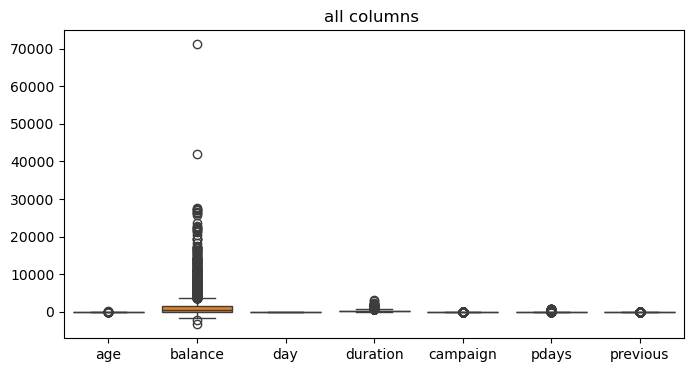

In [27]:
plt.figure(figsize=(8,4))
sns.boxplot(df)
plt.title('all columns ')
plt.show()

In [29]:
def handling_outliers(data):
    # Ensure data is a DataFrame
    if not isinstance(data, pd.DataFrame):
        raise ValueError("Input data must be a Pandas DataFrame")

    for col in df.select_dtypes(include=['int64', 'float64']).columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        # Example logic to handle outliers (replace with your logic)
        df[col] = df[col].clip(lower=q1 - 1.5 * iqr, upper=q3 + 1.5 * iqr)
    return df

# Call the function
df1 = handling_outliers(data)
print(df1)

      age            job  marital  education default  balance housing loan  \
0      30     unemployed  married    primary      no   1787.0      no   no   
1      33       services  married  secondary      no   3596.5     yes  yes   
2      35     management   single   tertiary      no   1350.0     yes   no   
3      30     management  married   tertiary      no   1476.0     yes  yes   
4      59    blue-collar  married  secondary      no      0.0     yes   no   
...   ...            ...      ...        ...     ...      ...     ...  ...   
4516   33       services  married  secondary      no   -333.0     yes   no   
4517   57  self-employed  married   tertiary     yes  -2047.5     yes  yes   
4518   57     technician  married  secondary      no    295.0      no   no   
4519   28    blue-collar  married  secondary      no   1137.0      no   no   
4520   44   entrepreneur   single   tertiary      no   1136.0     yes  yes   

       contact  day month  duration  campaign  pdays  previous 

In [31]:
df1 = handling_outliers(df)
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787.0,no,no,cellular,19,oct,79.0,1,-1,0,unknown,no
1,33,services,married,secondary,no,3596.5,yes,yes,cellular,11,may,220.0,1,-1,0,failure,no
2,35,management,single,tertiary,no,1350.0,yes,no,cellular,16,apr,185.0,1,-1,0,failure,no
3,30,management,married,tertiary,no,1476.0,yes,yes,unknown,3,jun,199.0,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0.0,yes,no,unknown,5,may,226.0,1,-1,0,unknown,no


In [33]:
df1.shape

(4521, 17)

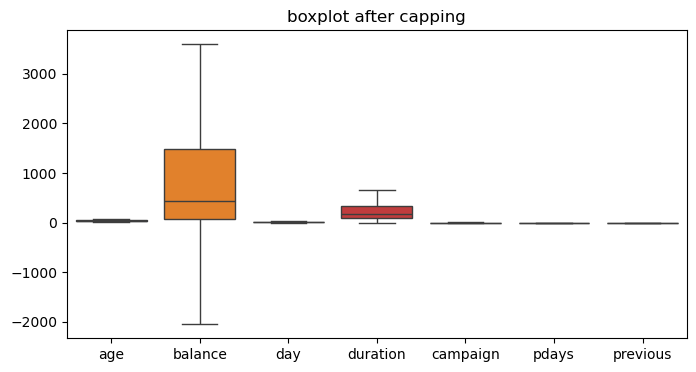

In [35]:
plt.figure(figsize=(8,4))
sns.boxplot(df1)
plt.title('boxplot after capping')
plt.show()

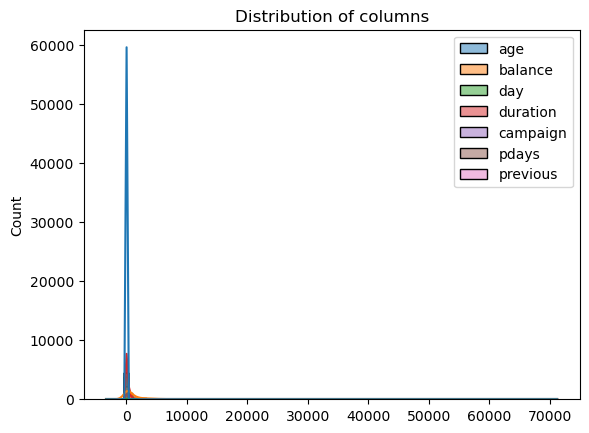

In [39]:
# Histogram for hours-per-week
sns.histplot(data=data, kde=True, bins=100)
plt.title("Distribution of columns")
plt.show()

In [ ]:
#FIND SKEWNESS

In [43]:
numerical_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
from scipy.stats import skew

for col in numerical_columns:
    skewness_value = skew(data[col].dropna()) 
    
    # Drop NaN values for accurate calculation
    
    print(f'Skewness of {col}: {skewness_value:.4f}')

Skewness of age: 0.6993
Skewness of balance: 6.5942
Skewness of day: 0.0946
Skewness of duration: 2.7715
Skewness of campaign: 4.7423
Skewness of pdays: 2.7162
Skewness of previous: 5.8733


In [ ]:
# CORRELATION HEATMAP

In [45]:
df_encoded=pd.get_dummies(df1,drop_first=True)
df_encoded

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,30,1787.0,19,79.0,1,-1,0,False,False,False,...,False,False,False,False,True,False,False,False,True,False
1,33,3596.5,11,220.0,1,-1,0,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,35,1350.0,16,185.0,1,-1,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,30,1476.0,3,199.0,4,-1,0,False,False,False,...,True,False,False,False,False,False,False,False,True,False
4,59,0.0,5,226.0,1,-1,0,True,False,False,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,-333.0,30,329.0,5,-1,0,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4517,57,-2047.5,9,153.0,1,-1,0,False,False,False,...,False,False,True,False,False,False,False,False,True,False
4518,57,295.0,19,151.0,6,-1,0,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4519,28,1137.0,6,129.0,4,-1,0,True,False,False,...,False,False,False,False,False,False,True,False,False,False


In [47]:
corr_matrix=df_encoded.corr()
corr_matrix

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
age,1.000000,0.092241,-0.018267,-0.011520,0.015961,NaN,NaN,-0.047850,0.016762,0.093478,...,0.035722,0.051061,-0.119751,0.028630,0.078626,-0.014819,-0.027074,0.045932,-0.014879,0.041021
balance,0.092241,1.000000,0.003111,0.026523,-0.016860,NaN,NaN,-0.054443,-0.010017,0.006231,...,0.067414,0.038365,-0.090876,0.163460,0.037355,0.012506,0.010767,0.053412,-0.048755,0.073072
day,-0.018267,0.003111,1.000000,-0.035075,0.158119,NaN,NaN,-0.027025,-0.015707,-0.011995,...,-0.217517,-0.024570,-0.028992,0.095832,0.040235,-0.043666,-0.021062,-0.027720,0.075100,-0.011244
duration,-0.011520,0.026523,-0.035075,1.000000,-0.085467,NaN,NaN,0.032452,0.010446,0.020431,...,-0.038371,-0.027023,0.023249,0.009730,0.012835,-0.015161,0.009420,0.071188,-0.026495,0.393818
campaign,0.015961,-0.016860,0.158119,-0.085467,1.000000,NaN,NaN,-0.000222,-0.016855,-0.001976,...,0.034615,-0.000310,-0.079473,-0.093688,-0.080724,-0.053047,-0.018942,-0.071489,0.131907,-0.063705
pdays,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
previous,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
job_blue-collar,-0.047850,-0.054443,-0.027025,0.032452,-0.000222,NaN,NaN,1.000000,-0.101057,-0.081987,...,0.020082,-0.032839,0.165276,-0.060881,-0.044295,-0.024890,-0.011244,-0.042435,0.026502,-0.068147
job_entrepreneur,0.016762,-0.010017,-0.015707,0.010446,-0.016855,NaN,NaN,-0.101057,1.000000,-0.031311,...,-0.020819,-0.020564,0.000128,0.073161,-0.017498,0.000742,-0.001836,-0.026645,0.022264,-0.015968
job_housemaid,0.093478,0.006231,-0.011995,0.020431,-0.001976,NaN,NaN,-0.081987,-0.031311,1.000000,...,0.039097,-0.002940,-0.069688,-0.013381,0.021783,0.009499,-0.006137,0.006874,0.008196,0.004872


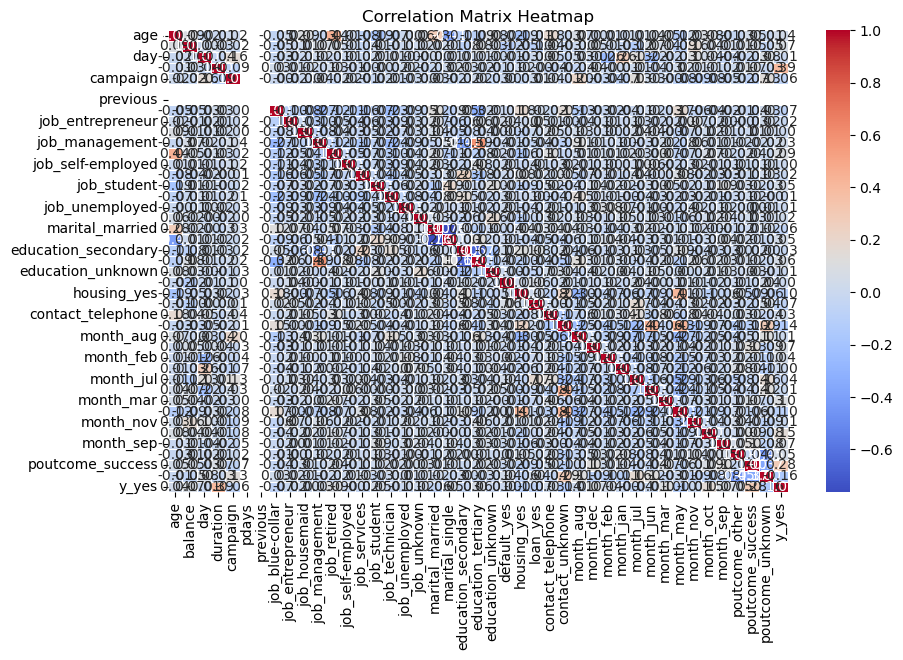

In [49]:
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix,annot=True,fmt=".2f",cmap="coolwarm",linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()


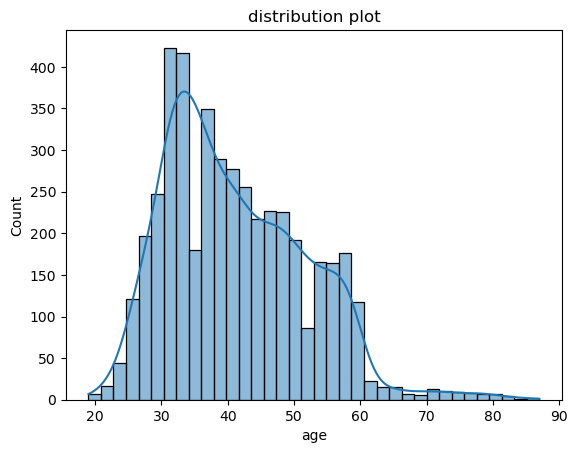

In [51]:
sns.histplot(data=data,x=data.age,kde=True)
plt.title('distribution plot')
plt.show()


In [ ]:
#COUNTPLOT FOR CATEGORICAL VARIABLES

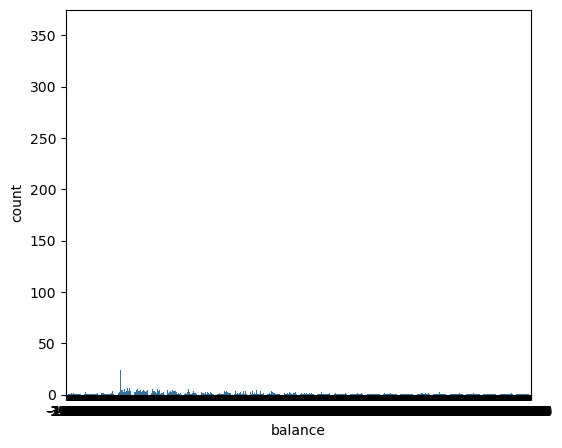

In [56]:
plt.figure(figsize=(6, 5))
sns.countplot(x='balance',data=data)
plt.show()

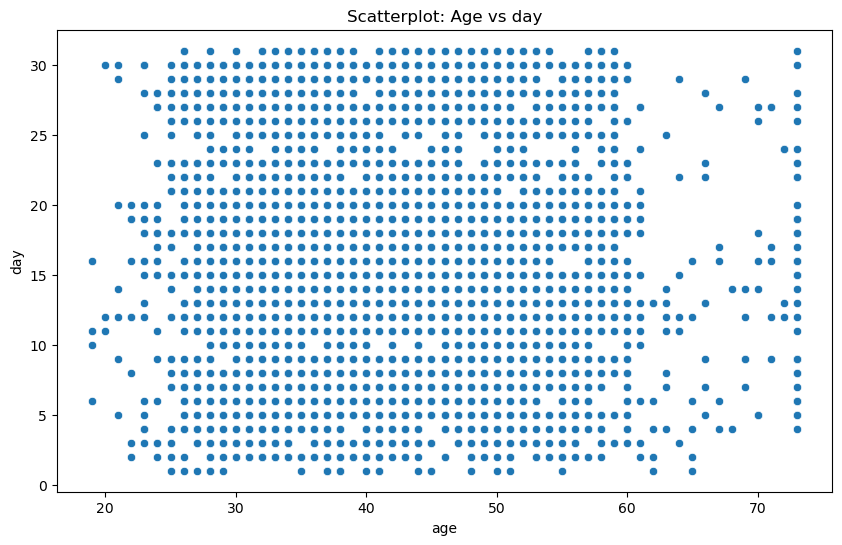

In [62]:
# Scatter plot of age vs day


plt.figure(figsize=(10,6))
sns.scatterplot(x='age', y='day', data=df_encoded)
plt.title("Scatterplot: Age vs day")
plt.show()

In [64]:
import pandas as pd
from scipy.stats import kurtosis
for col in numerical_columns:
    kurtosis_value = kurtosis(data[col].dropna(), fisher=True)

    # Drop NaN values for accurate calculation
    print(f'Kurtosis of {col}: {kurtosis_value:.4f}')

Kurtosis of age: 0.3471
Kurtosis of balance: 88.2913
Kurtosis of day: -1.0397
Kurtosis of duration: 12.5149
Kurtosis of campaign: 37.1265
Kurtosis of pdays: 7.9470
Kurtosis of previous: 51.9364


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd

In [11]:
import pandas as pd 